# Creating Visualizations of Intake-ESM Catalogs

A common initial task when working with a new dataset is figuring out what data is available. This is especially true when working with climate ensembles with several components and time-frequency output (ex. Community Earth System Model Large Ensemble, CESM-LE). Here, we will examine different methods of investigating this catalog

## Imports

Here, we will use [intake-esm](https://intake-esm.readthedocs.io/en/latest/) and [graphviz](https://graphviz.readthedocs.io/en/stable/manual.html), which can be installed using the following (including jupyterlab too!)

```
conda install -c conda-forge jupyterlab intake-esm graphviz
```

Once you install these packages, open jupyterlab!

In [1]:
import intake
from graphviz import Digraph

## Read in intake-esm catalog

In [2]:
col = intake.open_esm_datastore(
    'https://raw.githubusercontent.com/NCAR/cesm-lens-aws/master/intake-catalogs/aws-cesm1-le.json'
)

Typically, the process is to read in the dataframe containing the metadata, but this can be tough to read/understand what data is all there

In [3]:
col.df

,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,FLNS,net longwave flux at surface,atm,20C,daily,1.0,global,W/m2,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLNS....
1,FLNSC,clearsky net longwave flux at surface,atm,20C,daily,1.0,global,W/m2,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLNSC...
2,FLUT,upwelling longwave flux at top of model,atm,20C,daily,1.0,global,W/m2,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FLUT....
3,FSNS,net solar flux at surface,atm,20C,daily,1.0,global,W/m2,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FSNS....
4,FSNSC,clearsky net solar flux at surface,atm,20C,daily,1.0,global,W/m2,1920-01-01 12:00:00,2005-12-31 12:00:00,s3://ncar-cesm-lens/atm/daily/cesmLE-20C-FSNSC...
...,...,...,...,...,...,...,...,...,...,...,...
430,WVEL,vertical velocity,ocn,RCP85,monthly,60.0,global_ocean,centimeter/s,2006-01-16 12:00:00,2100-12-16 12:00:00,s3://ncar-cesm-lens/ocn/monthly/cesmLE-RCP85-W...
431,NaN,NaN,ocn,CTRL,static,NaN,global_ocean,NaN,NaN,NaN,s3://ncar-cesm-lens/ocn/static/grid.zarr
432,NaN,NaN,ocn,HIST,static,NaN,global_ocean,NaN,NaN,NaN,s3://ncar-cesm-lens/ocn/static/grid.zarr
433,NaN,NaN,ocn,RCP85,static,NaN,global_ocean,NaN,NaN,NaN,s3://ncar-cesm-lens/ocn/static/grid.zarr


You can search via intake-esm, using the following syntax

In [4]:
cat = col.search(experiment='20C', frequency='monthly')

Here again, it is tough to see everything that is here, also it requires knowing which experiments are in the dataset, and which frequency you are looking for

In [5]:
cat.df

,variable,long_name,component,experiment,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,FLNS,net longwave flux at surface,atm,20C,monthly,1.0,global,W/m2,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FLN...
1,FLNSC,clearsky net longwave flux at surface,atm,20C,monthly,1.0,global,W/m2,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FLN...
2,FLUT,upwelling longwave flux at top of model,atm,20C,monthly,1.0,global,W/m2,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FLU...
3,FSNS,net solar flux at surface,atm,20C,monthly,1.0,global,W/m2,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FSN...
4,FSNSC,clearsky net solar flux at surface,atm,20C,monthly,1.0,global,W/m2,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/atm/monthly/cesmLE-20C-FSN...
...,...,...,...,...,...,...,...,...,...,...,...
60,VNT,flux of heat in grid-y direction,ocn,20C,monthly,60.0,global_ocean,degC/s,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-VNT...
61,VVEL,velocity in grid-y direction,ocn,20C,monthly,60.0,global_ocean,centimeter/s,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-VVE...
62,WTS,salt flux across top face,ocn,20C,monthly,60.0,global_ocean,gram/kilogram/s,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-WTS...
63,WTT,heat flux across top face,ocn,20C,monthly,60.0,global_ocean,degC/s,1920-01-16 12:00:00,2005-12-16 12:00:00,s3://ncar-cesm-lens/ocn/monthly/cesmLE-20C-WTT...


## Using Graphviz in a Jupyter Notebook

[Graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) offers an interface to create network graphs

### Main "components" of [Graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)
* Digraph class
    * This is the main class that is used to build the visualization - typically assign to a variable `dot`, but you can use any variable you like!  
* Node
    * The "bubbles" which contain a numbered label (ex. '1') and a label (ex. 'HIST')
    * These can be connected together - the **numbered label must be a unique integer**
* Edge
    * Edges connect the different nodes, using the numbered indices (ex. `.edge('1', '3')` would connect the first and third nodes

### Example of case visualization

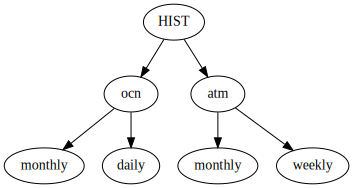

In [6]:
# Create Digraph object
dot = Digraph()

# Create the first node which serves as the main parent
dot.node('1', label='HIST')

dot.node('2', label='ocn')
dot.edge('1', '2')

# Add a monthly child from the ocn component parent
dot.node('3', label='monthly')
dot.edge('2', '3')

# Add a daily child from the ocn component parent
dot.node('4', label='daily')
dot.edge('2', '4')

# Add an atm component node and connect to experiment parent
dot.node('5', label='atm')
dot.edge('1', '5')

# Add a monthly child from the atm component parent
dot.node('6', label='monthly')
dot.edge('5', '6')

# Add a weekly child from the atm component parent
dot.node('7', label='weekly')
dot.edge('5', '7')

# Visualize the graph
dot

### Looping through the CESM-LE catalog

Let's apply this to our data catalog, assigning the dataframe with dataset attributes to `df`

In [7]:
df = col.df

In [8]:
# Create Digraph object - use the left to right orientation instead of vertical
dot = Digraph(graph_attr={'rankdir': 'LR'})

# Start counting at one for node numbers
num_node = 1

# Loop through the different experiments
for experiment in df.experiment.unique():
    exp_i = num_node
    dot.node(str(exp_i), label=experiment)
    num_node += 1

    # Loop through the different components in each experiment
    for component in df.loc[df.experiment == experiment].component.unique():
        comp_i = num_node
        dot.node(str(comp_i), label=component)
        dot.edge(str(exp_i), str(comp_i))
        num_node += 1

        # Loop through the frequency in each component within each experiment
        for frequency in df.loc[
            (df.experiment == experiment) & (df.component == component)
        ].frequency.unique():
            freq_i = num_node
            dot.node(str(freq_i), label=frequency)
            dot.edge(str(comp_i), str(freq_i))
            num_node += 1
        comp_i += 1
    exp_i += 1

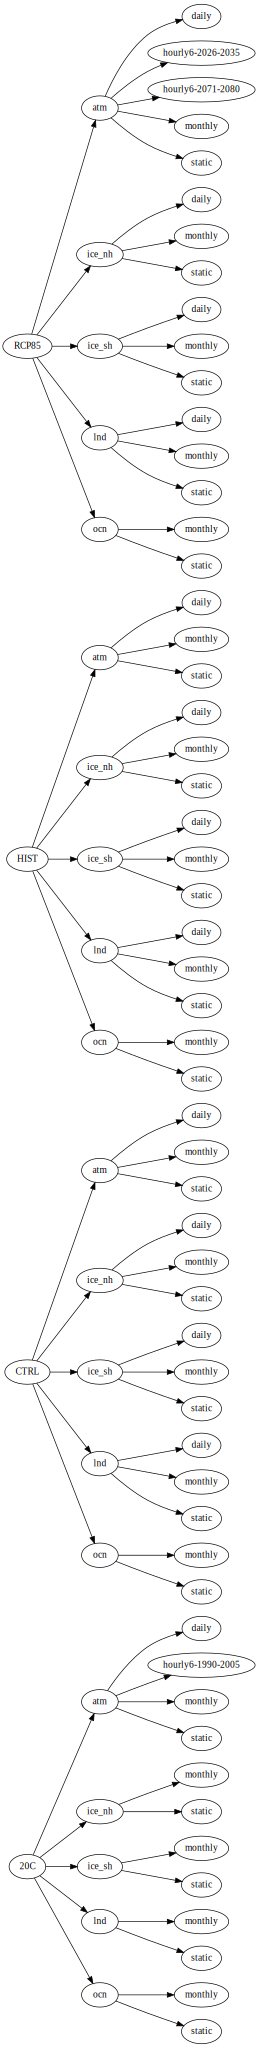

In [9]:
dot

## Conclusion
[Graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) can be a helpful tool when visualizing what data is within your data catalog - I hope this provides a good starting point in terms of using this with [intake-esm](https://intake-esm.readthedocs.io/en/latest/) catalogs!